In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import os

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOGL',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
3440 2024-05-23  177.070007  178.250000  172.949997  173.550003  173.550003   
3441 2024-05-24  174.979996  175.770004  173.649994  174.990005  174.990005   
3442 2024-05-28  174.449997  177.270004  174.369995  176.399994  176.399994   
3443 2024-05-29  175.429993  176.839996  174.720001  175.899994  175.899994   
3444 2024-05-30  175.199997  175.220001  171.789993  172.110001  172.110001   

        Volume  
3440  21024900  
3441  16572500  
3442  20572200  
3443  23388700  
3444  22931500  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3445 non-null   datetime64[ns]
 1   Open       3445 non-null   float64       
 2   High       3445 non-null   float64       
 3   Low        3445 non-null   float64       
 4   Close      3445 non-null   float64       
 5   Adj Close  3445 non-null   float64       
 6   Volume     3445 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 188.5 KB


In [ ]:

data.to_csv('data.csv')


In [ ]:
# Python ile geçmiş Finans verilerini içe aktarma ve biçimlendir.
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/data.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # ilk satırı atla (bu, sütun başlıklarından kurtulur)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # tarihleri tarih olarak al (dizgi olarak değil)
    btc_price.append(float(line[2])) # kapanış fiyatını kayan nokta olarak alın

timesteps[:10], btc_price[:10]

([datetime.datetime(2010, 9, 22, 0, 0),
  datetime.datetime(2010, 9, 23, 0, 0),
  datetime.datetime(2010, 9, 24, 0, 0),
  datetime.datetime(2010, 9, 27, 0, 0),
  datetime.datetime(2010, 9, 28, 0, 0),
  datetime.datetime(2010, 9, 29, 0, 0),
  datetime.datetime(2010, 9, 30, 0, 0),
  datetime.datetime(2010, 10, 1, 0, 0),
  datetime.datetime(2010, 10, 4, 0, 0),
  datetime.datetime(2010, 10, 5, 0, 0)],
 [12.834334373474121,
  12.878128051757812,
  13.056556701660156,
  13.23448371887207,
  13.350350379943848,
  13.20945930480957,
  13.242241859436035,
  13.263262748718262,
  13.136886596679688,
  13.222723007202148])

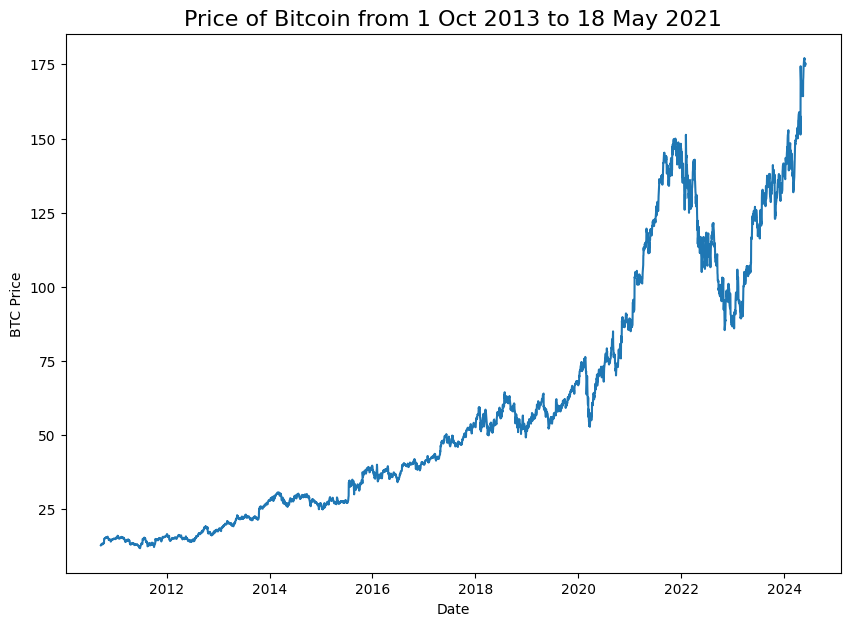

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

In [ ]:
df = data[['Date', 'Close']]

df

,Date,Close
0,2010-09-22,12.912913
1,2010-09-23,12.849850
2,2010-09-24,13.195445
3,2010-09-27,13.273524
4,2010-09-28,13.192442
...,...,...
3440,2024-05-23,173.550003
3441,2024-05-24,174.990005
3442,2024-05-28,176.399994
3443,2024-05-29,175.899994


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2010-09-22,12.912913
2010-09-23,12.849850
2010-09-24,13.195445
2010-09-27,13.273524
2010-09-28,13.192442
...,...
2024-05-23,173.550003
2024-05-24,174.990005
2024-05-28,176.399994


In [ ]:
# Get bitcoin date array
timesteps = df.index.to_numpy()
prices = df["Close"].to_numpy()

timesteps[:10], prices[:10]

(array(['2010-09-22T00:00:00.000000000', '2010-09-23T00:00:00.000000000',
        '2010-09-24T00:00:00.000000000', '2010-09-27T00:00:00.000000000',
        '2010-09-28T00:00:00.000000000', '2010-09-29T00:00:00.000000000',
        '2010-09-30T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
        '2010-10-04T00:00:00.000000000', '2010-10-05T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([12.91291332, 12.8498497 , 13.19544506, 13.27352428, 13.19244194,
        13.20545483, 13.15790844, 13.1536541 , 13.07182217, 13.46921921]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2756, 689, 2756, 689)

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

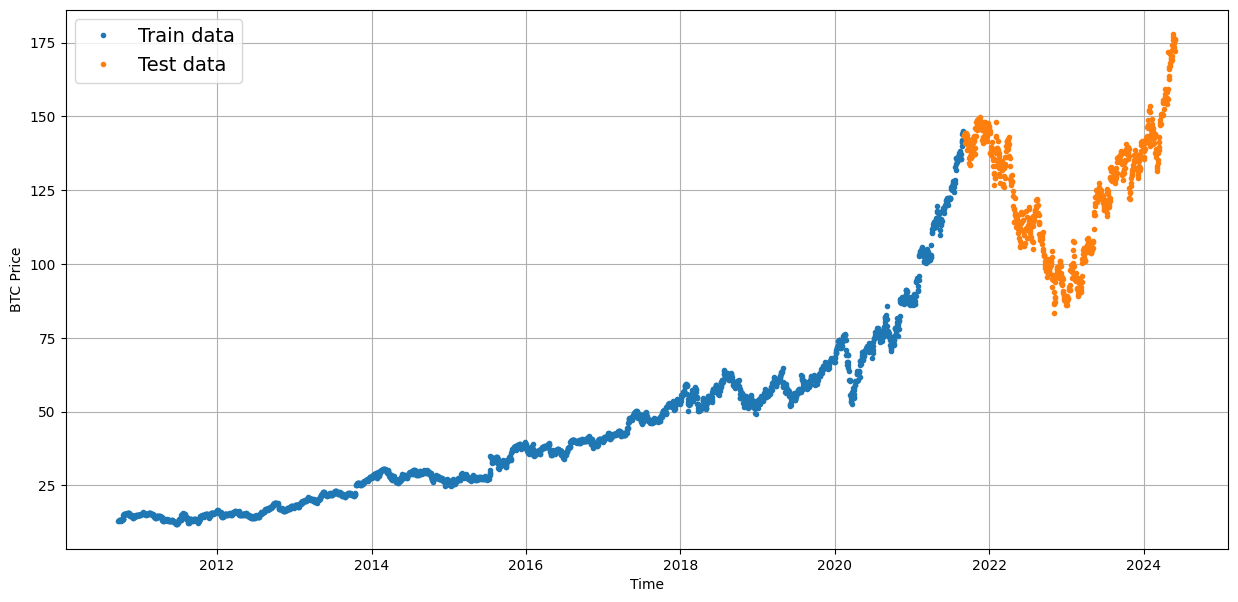

In [ ]:
# Test out plotting function
plt.figure(figsize=(15, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
import tensorflow as tf

In [ ]:
# Pencere ve ufuk boyutu için global değişkenler ayarlayalım
HORIZON = 1 # gelecek 1 günü tahmin et
WINDOW_SIZE = 7 # tahminde bulunmak için geçen haftanın Bitcoin verilerini kullanın

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Bitcoin verilerimizle ne yapmak istiyoruz
print(f"Kullanmak istiyoruz: {btc_price[:7]} bunu tahmin etmek: {btc_price[7]}")

Kullanmak istiyoruz: [12.834334373474121, 12.878128051757812, 13.056556701660156, 13.23448371887207, 13.350350379943848, 13.20945930480957, 13.242241859436035] bunu tahmin etmek: 13.263262748718262


In [ ]:
# Pencere etiketleme fonksiyonunu test edin
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    1D dizisini, window_size ve horizon boyutunda etiketlenmiş ardışık pencerelerden oluşan 2D diziye dönüştürür.
    """
    # 1. Belirli window_size bir pencere oluşturun (etiketleme için horizon ekleyin)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    # window_step: Pencerenin her bir adımı için indeksleri içeren bir dizi oluşturur. `np.expand_dims` kullanarak bu diziyi iki boyutlu hale getirir.

    # 2. Birden fazla pencere adımı içeren 2D bir dizi oluşturun (0 indekslemeyi hesaba katmak için 1 çıkarın)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # window_indexes: `window_step` dizisini giriş dizisinin her bir adımıyla kaydırarak pencere indekslerini oluşturur. Bu, her bir pencerenin başlangıç noktalarını belirler.

    # 3. Hedef diziden (bir zaman serisi) birden fazla pencere adımı içeren 2D diziyi indeksleyin
    windowed_array = x[window_indexes]
    # windowed_array: Giriş dizisinden pencere indekslerini kullanarak veriyi çıkarır ve 2D bir pencere dizisi oluşturur.

    # 4. Etiketlenmiş pencereleri alın
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels
    # windows, labels: `get_labelled_windows` fonksiyonunu kullanarak pencereleri ve etiketlerini oluşturur ve döndürür.


In [ ]:
# Prices dizisinden tam pencereler ve etiketler oluşturun
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(f"Pencere sayısı: {len(full_windows)}, Etiket sayısı: {len(full_labels)}")


Pencere sayısı: 3438, Etiket sayısı: 3438


In [ ]:
# İlk 3 pencere/etiketi görüntüleyin
for i in range(3):
    print(f"Pencere: {full_windows[i]} -> Etiket: {full_labels[i]}")


Pencere: [12.91291332 12.8498497  13.19544506 13.27352428 13.19244194 13.20545483
 13.15790844] -> Etiket: [13.1536541]
Pencere: [12.8498497  13.19544506 13.27352428 13.19244194 13.20545483 13.15790844
 13.1536541 ] -> Etiket: [13.07182217]
Pencere: [13.19544506 13.27352428 13.19244194 13.20545483 13.15790844 13.1536541
 13.07182217] -> Etiket: [13.46921921]


In [ ]:
# İlk 5 pencere ve etiketi incelemek için yazdırın
print(full_windows[:5], full_labels[:5])


[[12.91291332 12.8498497  13.19544506 13.27352428 13.19244194 13.20545483
  13.15790844]
 [12.8498497  13.19544506 13.27352428 13.19244194 13.20545483 13.15790844
  13.1536541 ]
 [13.19544506 13.27352428 13.19244194 13.20545483 13.15790844 13.1536541
  13.07182217]
 [13.27352428 13.19244194 13.20545483 13.15790844 13.1536541  13.07182217
  13.46921921]
 [13.19244194 13.20545483 13.15790844 13.1536541  13.07182217 13.46921921
  13.37212181]] [[13.1536541 ]
 [13.07182217]
 [13.46921921]
 [13.37212181]
 [13.26351357]]


In [ ]:
# Pencereleri ve etiketleri eğitim ve test setlerine ayırmak için bir fonksiyon oluşturun
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Eşleşen pencere ve etiket çiftlerini eğitim ve test setlerine ayırır.
    """
    split_size = int(len(windows) * (1 - test_split))  # Bu, varsayılan olarak %80 eğitim/%20 test olarak ayarlanır
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels
    # train_windows, train_labels, test_windows, test_labels: Pencere ve etiketleri belirtilen oranda (varsayılan %80 eğitim, %20 test) eğitim ve test setlerine ayırır ve döndürür.


In [ ]:
# Eğitim ve test pencereleri oluşturun
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
print(f"Eğitim pencereleri: {len(train_windows)}, Test pencereleri: {len(test_windows)}")
print(f"Eğitim etiketleri: {len(train_labels)}, Test etiketleri: {len(test_labels)}")


Eğitim pencereleri: 2750, Test pencereleri: 688
Eğitim etiketleri: 2750, Test etiketleri: 688


In [ ]:
# İlk 5 eğitim penceresi ve etiketini incelemek için yazdırın
print(train_windows[:5], train_labels[:5])


[[12.91291332 12.8498497  13.19544506 13.27352428 13.19244194 13.20545483
  13.15790844]
 [12.8498497  13.19544506 13.27352428 13.19244194 13.20545483 13.15790844
  13.1536541 ]
 [13.19544506 13.27352428 13.19244194 13.20545483 13.15790844 13.1536541
  13.07182217]
 [13.27352428 13.19244194 13.20545483 13.15790844 13.1536541  13.07182217
  13.46921921]
 [13.19244194 13.20545483 13.15790844 13.1536541  13.07182217 13.46921921
  13.37212181]] [[13.1536541 ]
 [13.07182217]
 [13.46921921]
 [13.37212181]
 [13.26351357]]


In [ ]:
test_windows[:5], test_labels[:5]

(array([[142.07899475, 141.44050598, 144.0039978 , 144.59049988,
         144.69749451, 145.21549988, 143.28700256],
        [141.44050598, 144.0039978 , 144.59049988, 144.69749451,
         145.21549988, 143.28700256, 143.73950195],
        [144.0039978 , 144.59049988, 144.69749451, 145.21549988,
         143.28700256, 143.73950195, 144.28050232],
        [144.59049988, 144.69749451, 145.21549988, 143.28700256,
         143.73950195, 144.28050232, 143.69099426],
        [144.69749451, 145.21549988, 143.28700256, 143.73950195,
         144.28050232, 143.69099426, 143.54100037]]),
 array([[143.73950195],
        [144.28050232],
        [143.69099426],
        [143.54100037],
        [140.87600708]]))

In [ ]:
train_windows[:5]

array([[12.91291332, 12.8498497 , 13.19544506, 13.27352428, 13.19244194,
        13.20545483, 13.15790844],
       [12.8498497 , 13.19544506, 13.27352428, 13.19244194, 13.20545483,
        13.15790844, 13.1536541 ],
       [13.19544506, 13.27352428, 13.19244194, 13.20545483, 13.15790844,
        13.1536541 , 13.07182217],
       [13.27352428, 13.19244194, 13.20545483, 13.15790844, 13.1536541 ,
        13.07182217, 13.46921921],
       [13.19244194, 13.20545483, 13.15790844, 13.1536541 , 13.07182217,
        13.46921921, 13.37212181]])

In [ ]:
# Belirli bir dosya adıyla ModelCheckpoint callback'ini uygulamak için bir fonksiyon oluşturun
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_loss",
                                              verbose=0,  # Sadece sınırlı miktarda metin çıktısı
                                              save_best_only=True)


In [ ]:
from keras.models import Sequential
from tensorflow.keras import layers
tf.random.set_seed(42)

# Functional API ile bir LSTM modeli oluşturalım
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(300, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs=inputs, outputs=output, name="model_1_LSTM")


# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history = model_1.fit(train_windows,
            train_labels,
            epochs=250,
            verbose=1,
            batch_size=270,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/250
11/11 [==============================] - 13s 891ms/step - loss: 33.7050 - val_loss: 21.8937
Epoch 2/250
11/11 [==============================] - 2s 229ms/step - loss: 6.8446 - val_loss: 15.6559
Epoch 3/250
11/11 [==============================] - 3s 263ms/step - loss: 3.1051 - val_loss: 7.1912
Epoch 4/250
11/11 [==============================] - 2s 228ms/step - loss: 1.8060 - val_loss: 4.8886
Epoch 5/250
11/11 [==============================] - 4s 354ms/step - loss: 1.0679 - val_loss: 3.1251
Epoch 6/250
11/11 [==============================] - 3s 281ms/step - loss: 0.8548 - val_loss: 3.0377
Epoch 7/250
11/11 [==============================] - 2s 239ms/step - loss: 0.7932 - val_loss: 2.9917
Epoch 8/250
11/11 [==============================] - 0s 28ms/step - loss: 0.7921 - val_loss: 3.0112
Epoch 9/250
11/11 [==============================] - 2s 236ms/step - loss: 0.7691 - val_loss: 2.9784
Epoch 10/250
11/11 [==============================] - 3s 254ms/step - loss: 0.7647 - val

## LSTM Modeli:
Girdi Katmanı (inputs): Girdi boyutunu belirler (WINDOW_SIZE).

Lambda Katmanı (x): Girdiye yeni bir boyut ekler. Bu, LSTM katmanının girdiyi uygun bir formatta almasını sağlar.

LSTM Katmanı (x): 128 birimli ve ReLU aktivasyon fonksiyonuna sahip LSTM katmanı.

Dense Katmanı (x): 32 birimli ve ReLU aktivasyon fonksiyonuna sahip yoğun katman.

Çıkış Katmanı (output): Ufuk boyutunda (HORIZON) bir çıkış katmanı.

Model (model_1): Girdi ve çıkış katmanlarını belirleyerek model tanımlanır.

In [ ]:
# En iyi model 5 versiyonunu yükleyin ve test verileri üzerinde değerlendirin
model_1 = tf.keras.models.load_model("model_experiments/model_1_LSTM")
model_1.evaluate(test_windows, test_labels)


In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  MASE (Mevsimsellik Olmayan Veriler için) uygulaması.
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # y_true ve y_pred arasındaki Ortalama Mutlak Hata (MAE) hesaplanır.

  # Naive tahminin MAE'sini bulun (mevsimsellik yok)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  # Mevsimsellik olmadan (bir gün kayma ile) naive tahminin MAE'si hesaplanır.

  return mae / mae_naive_no_season
  # MASE, naive tahminin MAE'sine bölünerek hesaplanır.


In [37]:
# Model tahminlerini ve doğruluk değerlerini almak ve değerlendirme metriklerini döndürmek için bir işlev oluşturun
def evaluate_preds(y_true, y_pred):
  # Metriğin hesaplanması için float32 veri tipine dönüştürün
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Çeşitli değerlendirme metriklerini hesaplayın
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
  # Hesaplanan değerlendirme metriklerini bir sözlük olarak döndürür.


MAE (Mean Absolute Error): Ortalama Mutlak Hata.

MSE (Mean Squared Error): Ortalama Kare Hata.

RMSE (Root Mean Squared Error): Ortalama Kare Hatanın Karekökü.

MAPE (Mean Absolute Percentage Error): Ortalama Mutlak Yüzde Hatası.

MASE (Mean Absolute Scaled Error): Ortalama Mutlak Ölçeklenmiş Hata.

In [38]:
def make_preds(model, input_data):
  """
  Modeli kullanarak input_data için tahminler yapar.
  """
  forecast = model.predict(input_data)
  # Modelin girdi verisi üzerinde tahminler yapmasını sağlar.
  return tf.squeeze(forecast) # Tahminleri 1D dizi olarak döndürür.
  # Tahminlerin tek boyutlu bir dizi olarak döndürülmesini sağlar.


In [39]:
# LSTM modelimizle tahmin yapın
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:5]
# make_preds fonksiyonunu kullanarak model_1 ve test_windows verileri ile tahminler yapar

22/22 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([144.24146, 143.97836, 144.64291, 144.35068, 144.13992],
      dtype=float32)>

In [40]:
# Model 5 tahminlerini değerlendirin
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results


{'mae': 1.9376998,
 'mse': 6.8097477,
 'rmse': 2.6095493,
 'mape': 1.5994096,
 'mase': 1.0439543}

In [36]:


import datetime
today = datetime.date.today()
model_1_preds = make_preds(model_1, test_windows)
print("Tahmini en yüksek fiyat:", model_1_preds[-1])
print("Tarih:", today)


22/22 [==============================] - 0s 4ms/step
Tahmini en yüksek fiyat: tf.Tensor(176.853, shape=(), dtype=float32)
Tarih: 2024-05-31
